<a href="https://colab.research.google.com/github/CVH4OYC/ML_lab/blob/main/%D0%9A%D0%A21%D0%A71.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Разведочный анализ с использованием pandas

Ссылка на датасет https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com

Подключение диска

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Подключение библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Считываем данные

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/drugsComTrain_raw.tsv',delimiter='\t')

Выводим шапку датасета

In [ ]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


Описание признаков:
1. drugName (категориальный): название препарата
2. condition (категориальный): название состояния
3. review (текстовый): отзыв пациента
4. rating (числовой): оценка, поставленная пациентом (по 10-бальной шкале)
5. date (дата): дата написания отзыва
6. usefulCount (числовой): количество пользователей, которые посчитали отзыв полезным
7. Unamed: 0. Id отзыва. Переименуем его



In [ ]:
df.rename(columns={'Unnamed: 0':'Id'}, inplace=True)
# inplace отвечает за то изменять или текущий датафрейм или создавать копию

Проверяем, есть ли дубликаты строк

In [ ]:
df.duplicated().sum()

0

Вывод статистики числовых признаков

In [ ]:
df.describe()

,Id,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


Вывод статистики по категориальным признакам

In [ ]:
df.describe(include=['O'])

,drugName,condition,review,date
count,161297,160398,161297,161297
unique,3436,884,112329,3579
top,Levonorgestrel,Birth Control,"""Good""","March 1, 2016"
freq,3657,28788,33,146


Вывод полной информации по датафрейму

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Id           161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


Отсюда видно, что присутствуют пропуски в столбце condition. Для проверки посчитаем количество пропусков в каждом столбце


In [ ]:
df.isnull().sum()

,0
Id,0
drugName,0
condition,899
review,0
rating,0
date,0
usefulCount,0


Заменим пропуски на "Неизвестно"

In [ ]:
df.fillna(value={"condition":'Неизвестно'},inplace=True)

Проверяем количество пропусков

In [ ]:
df.isnull().sum()

,0
Id,0
drugName,0
condition,0
review,0
rating,0
date,0
usefulCount,0


Вывод названий строк и столбцов

In [ ]:
print("Названия столбцов:\n")
for column_name in df.columns:
    print(column_name)

print("\nСтроки:")
print(df.index)

Названия столбцов:

Id
drugName
condition
review
rating
date
usefulCount

Строки:
RangeIndex(start=0, stop=161297, step=1)


Так как уникальных болезней, лекарств и отзывов слишком много, выделим топ-10 по количеству среди этих признаков

In [ ]:
# Определяем топ-10 болезней и лекарств
top_conditions = df['condition'].value_counts().index[:10]
top_drugs = df['drugName'].value_counts().index[:10]
top_reviews = df['review'].value_counts().index[:10]
# Выбираем данные, которые с ними связаны
df_top_conditions = df[df['condition'].isin(top_conditions)]
df_top_drugs = df[df['drugName'].isin(top_drugs)]
df_top_reviews = df[df['review'].isin(top_reviews)]



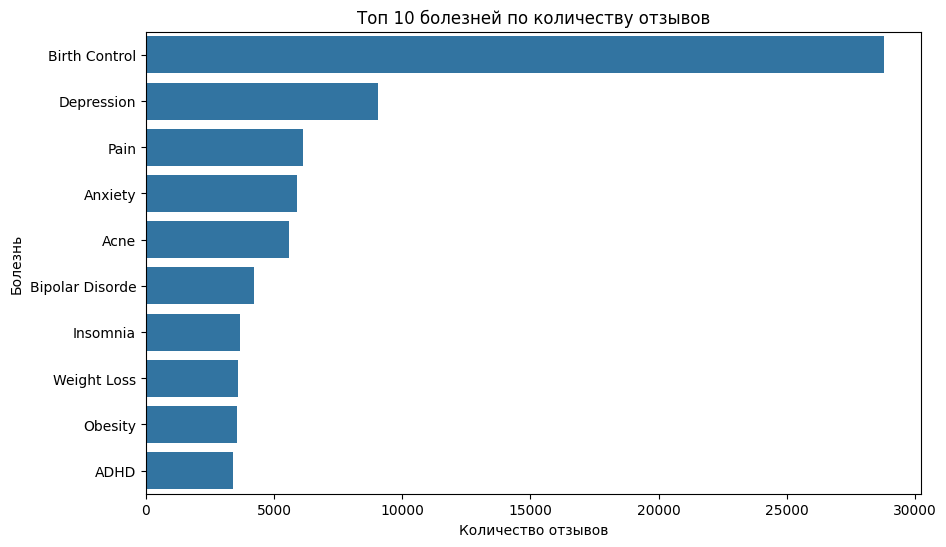

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='condition', data=df_top_conditions, order=df_top_conditions['condition'].value_counts().index)
plt.title('Топ 10 болезней по количеству отзывов')
plt.xlabel('Количество отзывов')
plt.ylabel('Болезнь')
plt.show()

Больше всего отзывов оставляют на противозачаточные средства

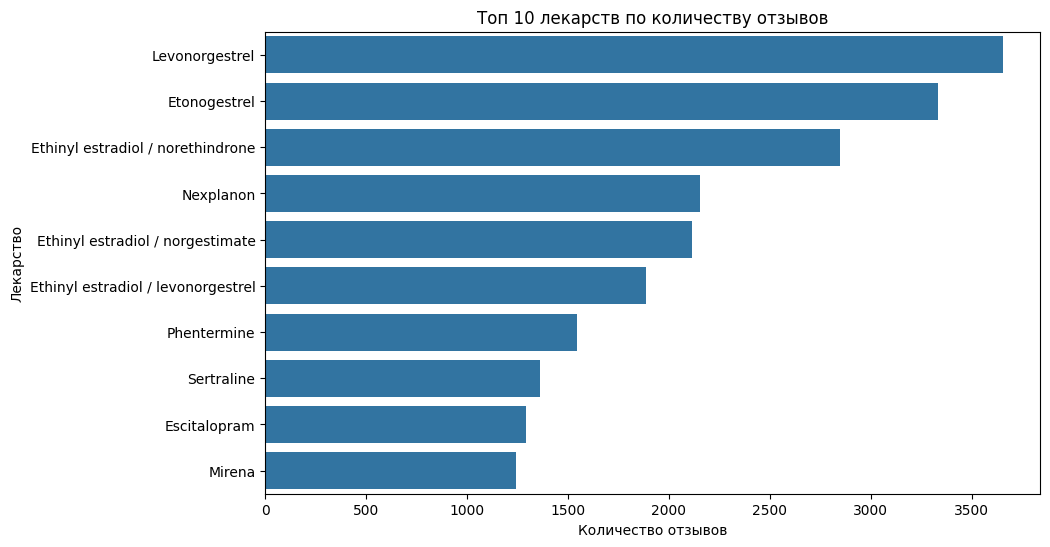

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='drugName', data=df_top_drugs, order=df_top_drugs['drugName'].value_counts().index)
plt.title('Топ 10 лекарств по количеству отзывов')
plt.xlabel('Количество отзывов')
plt.ylabel('Лекарство')
plt.show()

Большая часть из топ-10 относится к противозачаточным средствам, кроме:

*   Phentermine - для снижения массы тела,
*   Sertraline - антидепресант,
* Escitalopram - антидепресант.







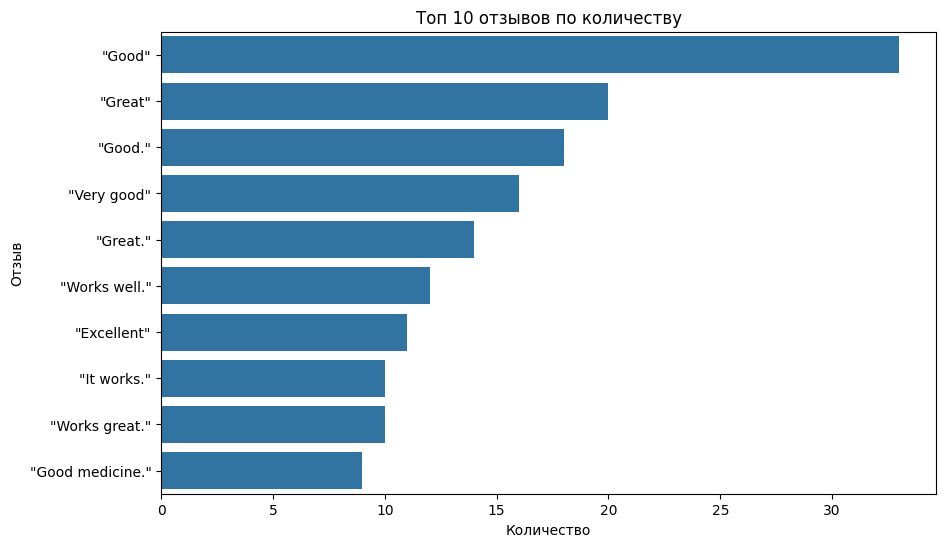

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='review', data=df_top_reviews, order=df_top_reviews['review'].value_counts().index)
plt.title('Топ 10 отзывов по количеству')
plt.xlabel('Количество')
plt.ylabel('Отзыв')
plt.show()

Возможно, в негативных пользователях лучше расписывают, что им не понравилось => повторов в тексте отзывов меньше

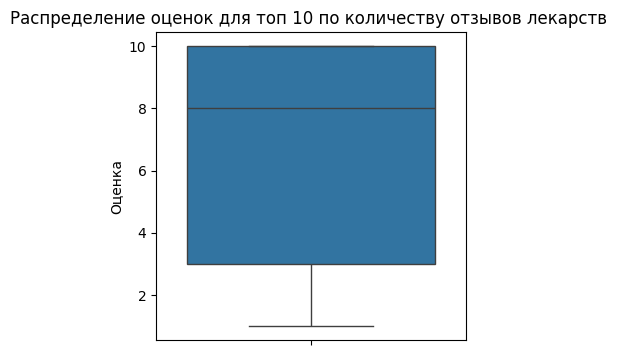

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(y='rating', data=df_top_drugs)
plt.title('Распределение оценок для топ 10 по количеству отзывов лекарств ')
plt.ylabel('Оценка')
plt.show()

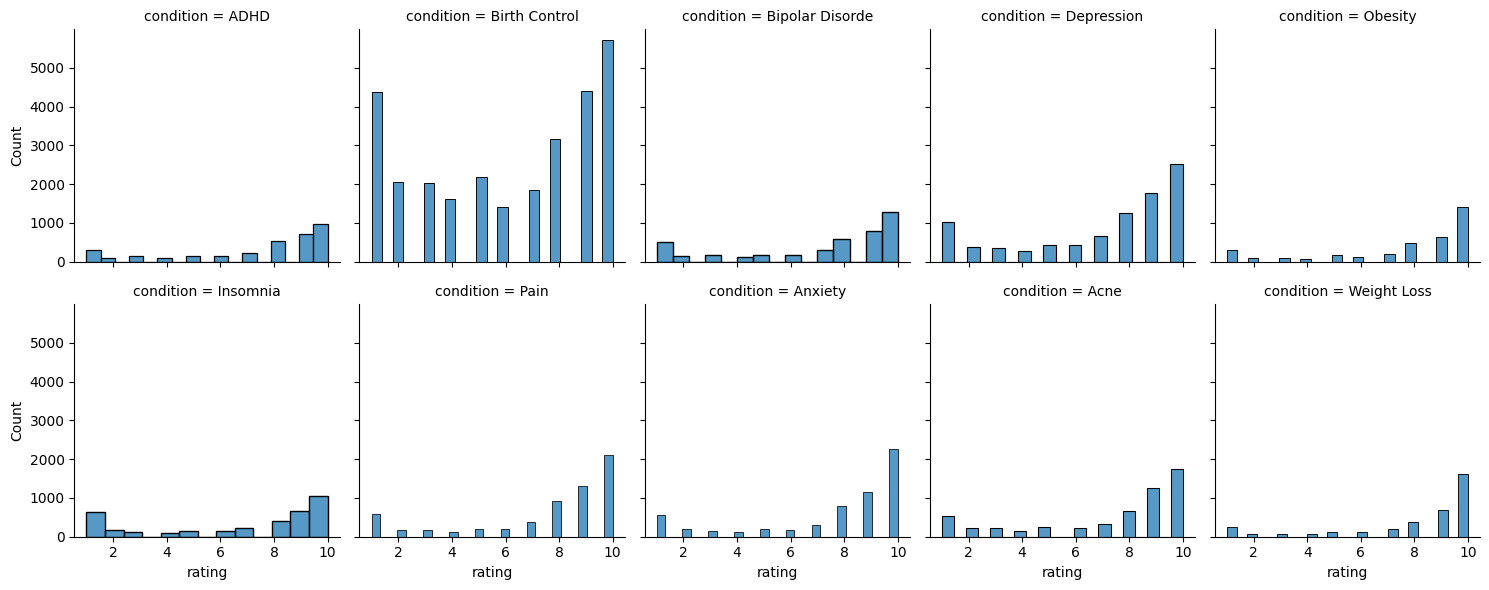

In [ ]:
g = sns.FacetGrid(df_top_conditions, col='condition', col_wrap=5, height=3)
g.map(sns.histplot, 'rating')
plt.show()

В целом, можно сказать, что для топ-10 заболеваний/категории лекарств количество хороших отзывов преобладает

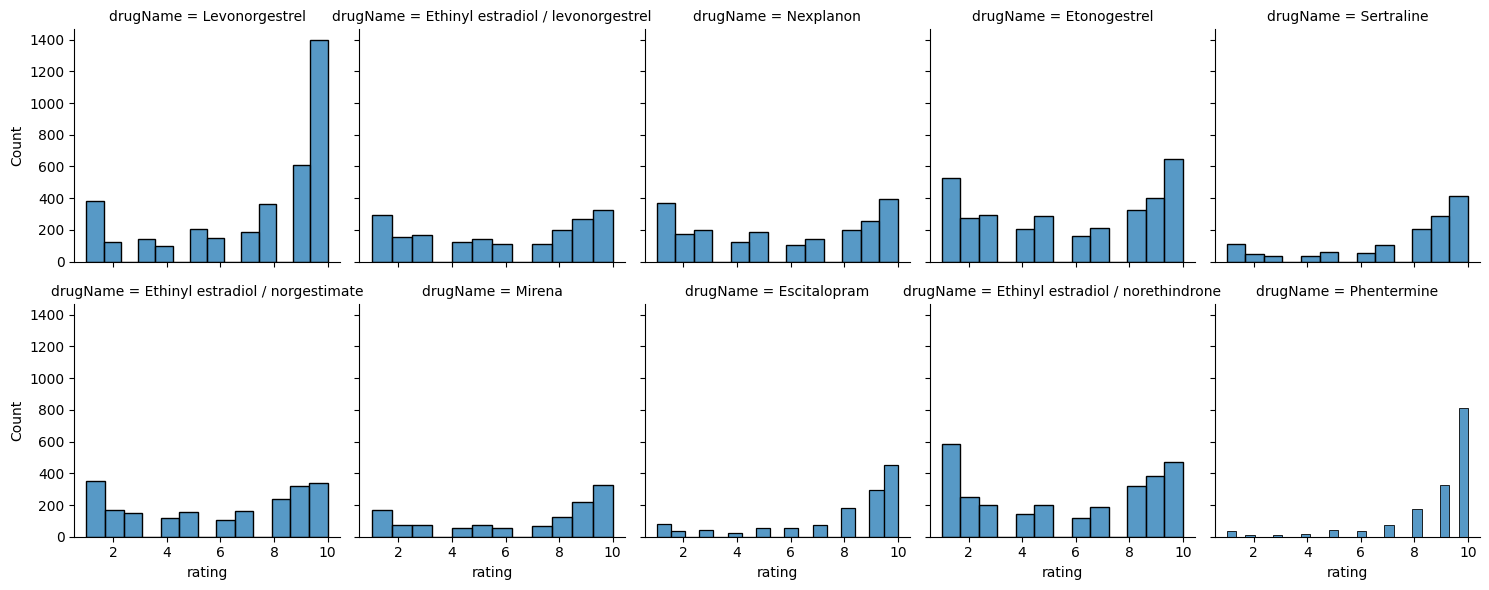

In [ ]:
g = sns.FacetGrid(df_top_drugs, col='drugName', col_wrap=5, height=3)
g.map(sns.histplot, 'rating')
plt.show()

А вот для конкретных лекарств ситуация другая

Предположим, что в нелетние времена года люди болеют чаще всего. Значиит, покупают в эти периоды лекарства чаще, чем летом. Проверим это, выделив в качестве заболевания кашель

<ipython-input-44-cf9e130498e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cough_reviews['date'] = pd.to_datetime(cough_reviews['date'], format='%B %d, %Y')
<ipython-input-44-cf9e130498e4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cough_reviews['month'] = cough_reviews['date'].dt.strftime('%B')


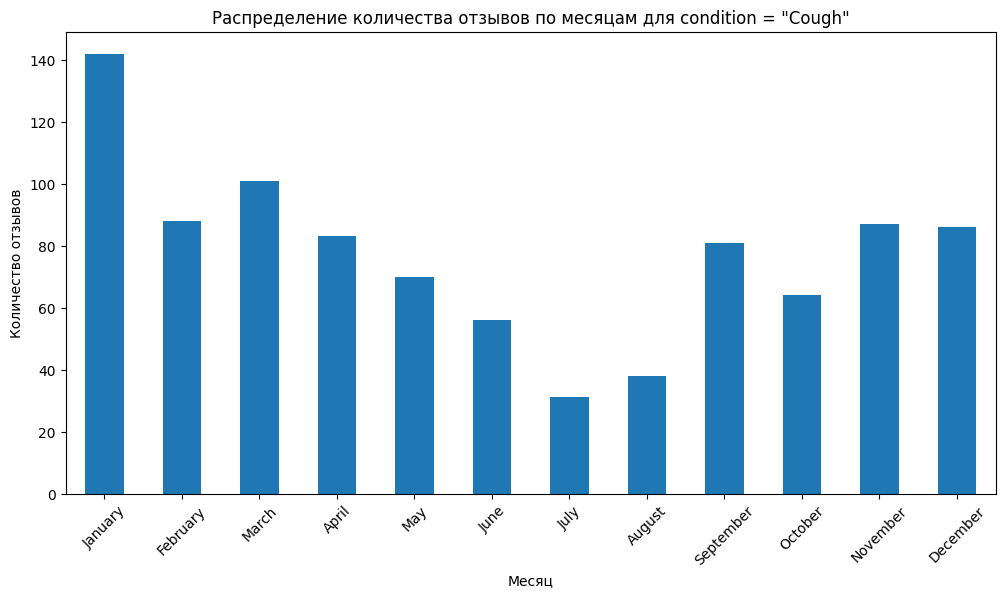

In [ ]:
cough_reviews = df[df['condition'] == 'Cough']

# Преобразование столбца 'date' в формат datetime
cough_reviews['date'] = pd.to_datetime(cough_reviews['date'], format='%B %d, %Y')

# Группировка данных по месяцам и подсчет количества отзывов
cough_reviews['month'] = cough_reviews['date'].dt.strftime('%B')
month_counts = cough_reviews['month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Построение гистограммы
plt.figure(figsize=(12, 6))
month_counts.plot(kind='bar')
plt.title('Распределение количества отзывов по месяцам для condition = "Cough"')
plt.xlabel('Месяц')
plt.ylabel('Количество отзывов')
plt.xticks(rotation=45)
plt.show()

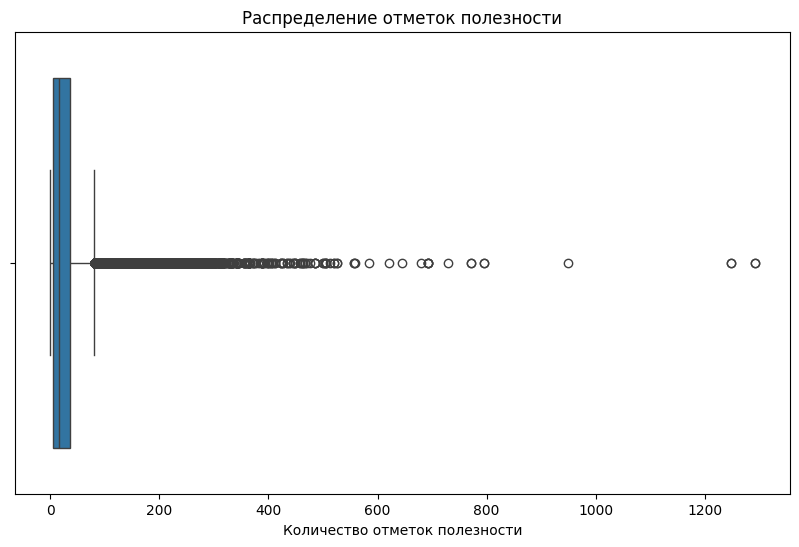

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['usefulCount'])
plt.title('Распределение отметок полезности')
plt.xlabel('Количество отметок полезности')
plt.show()

Пользователи не очень любят оценивать полезность отзывов

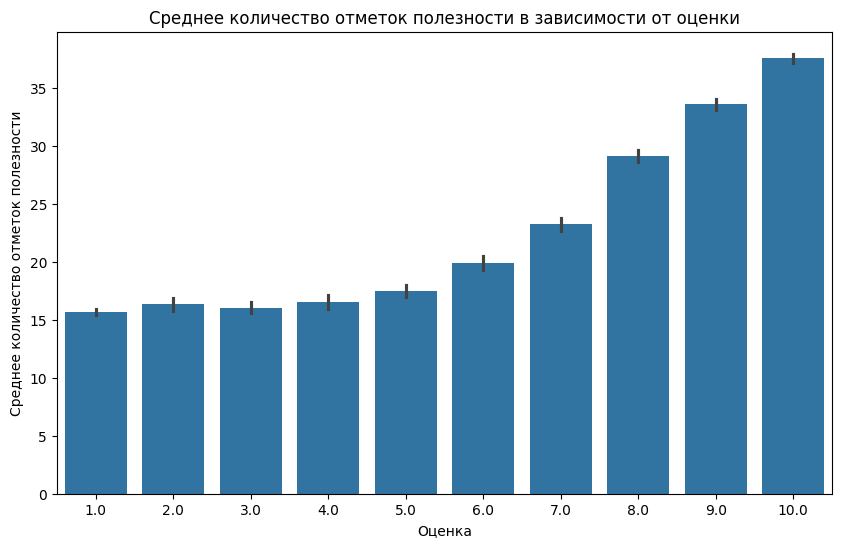

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='usefulCount', data=df, estimator=np.mean)
plt.title('Среднее количество отметок полезности в зависимости от оценки')
plt.xlabel('Оценка')
plt.ylabel('Среднее количество отметок полезности')
plt.show()

Можно сказать, что чем выше оценка лекарства, тем выше среднее количество отметок полезности. Это можно проверить при помощи тепловой карты корреляции. Для этого сначала нужно перекодировать категориальные признаки

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df[['drugName', 'condition','review','date']] = encoder.fit_transform(df[['drugName', 'condition','review','date']])
df.head()

,Id,drugName,condition,review,rating,date,usefulCount
0,206461,3203.0,466.0,77850.0,9.0,2483.0,27
1,95260,1431.0,73.0,86240.0,8.0,192.0,192
2,92703,1854.0,165.0,57839.0,5.0,660.0,17
3,138000,2285.0,165.0,99172.0,8.0,2896.0,10
4,35696,516.0,574.0,94329.0,9.0,2867.0,37


<Axes: >

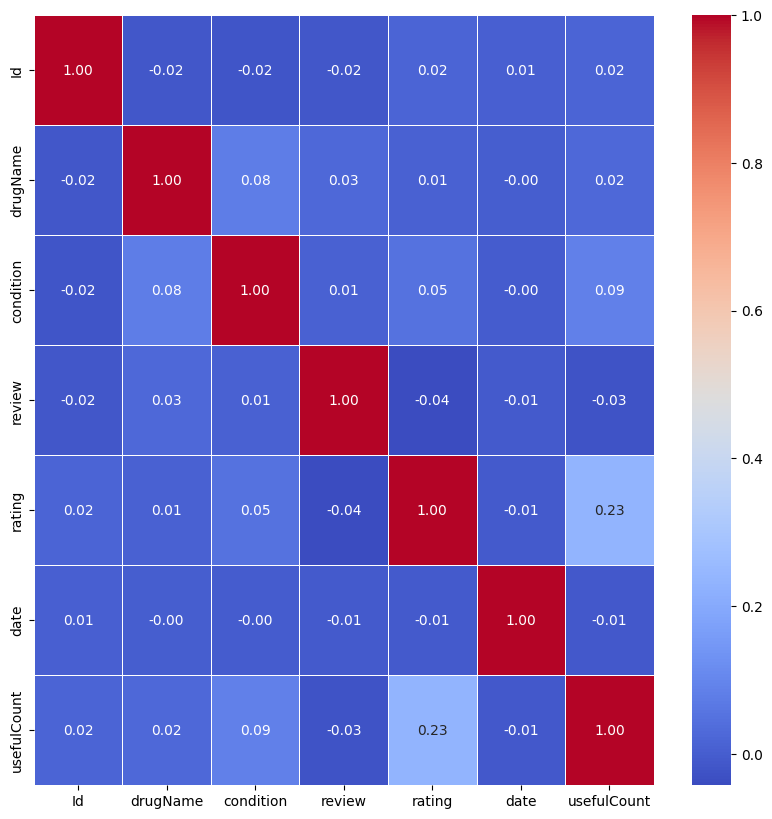

In [ ]:
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

raiting и usefulCount связаны больше всех остальных признаков, но связь очень слабая